# **Random Forest**

Random Forest is a supervised machine learning algorithm that operates as an ensemble of decision trees.

It is used for both classification and regression tasks, offering high accuracy, robustness, and resistance to overfitting.

Instead of relying on a single decision tree, Random Forest builds multiple trees using bootstrap sampling (bagging), where each tree is trained on a different random subset of the dataset.

During training, each tree considers only a random subset of features at each split, making the model diverse and reducing bias.

Once the individual decision trees are trained, Random Forest aggregates their predictions to make a final decision.

For classification, it uses a majority voting approach, where the most frequent class predicted by the trees is selected.

For regression, it averages the outputs of all trees to generate the final result.

The randomization in data selection and feature splitting helps Random Forest avoid overfitting and perform well on large, high-dimensional datasets.

**Bootstraping:**

Bootstrapping is a resampling technique used to create multiple training datasets from the original dataset.
1. Without Replacement

  - Once a data point is selected and added to the subset, it is removed from the main dataset.

  - No data point appears more than once in a subset.

  - Example: If we create two subsets, a data point appearing in the first subset cannot appear in the second.

  - Use Case: k-fold cross-validation (each fold gets unique data).
2. With Replacement
  - Data points are copied into the subset instead of being removed.

  - The original dataset remains unchanged, meaning the same data point can be selected multiple times.

  - Example: If we create multiple subsets, the same data points can appear in multiple subsets.

  - Use Case: Random Forest (each decision tree gets a different bootstrapped sample).


 In Random Forest, each Decision Tree is trained on a different bootstrapped subset, ensuring diversity. This reduces overfitting, improves accuracy, and enhances model stability by aggregating predictions from multiple trees

**Bagging**(Bootstrap Aggregation)
Bagging (Bootstrap Aggregation) is an ensemble learning technique that improves model accuracy and stability by reducing variance. It works by training multiple models on different random subsets of the original data and then combining their outputs.

How Bagging Works:

 1. Bootstrapping (Sampling with Replacement)
  - Multiple subsets of data are created by randomly sampling from the original dataset with replacement. Some data points may appear multiple times, while others may not be selected.

 2. Training Independent Models
  - Each subset is used to train a separate model (e.g., Decision Trees in Random Forest). Since each model sees slightly different data, they learn different patterns.

 3. Aggregation (Averaging or Voting)
  - For classification, predictions from all models are combined using majority voting (most common class wins).
  - For regression, predictions are averaged to get the final output.


**Boosting** (Ada Boostind or Adaptive Boosting)

Boosting is an ensemble learning technique that improves model performance by focusing on hard-to-classify examples(the data points that previous models in the sequence struggled to predict correctly).

Unlike bagging, where multiple models work independently, boosting trains models sequentially, with each new model correcting errors made by the previous ones.

How AdaBoost (Adaptive Boosting) Works:

1. Initialize Weights
 - Each data point in the dataset is assigned an equal weight initially.
2. Train Weak Learner
 -  A simple model (e.g., a Decision Tree with one split, called a stump) is trained.
3. Evaluate Errors
 -  Misclassified data points are given higher weights, so the next model pays more attention to them.
4. Train Next Model
 - A new weak learner is trained on this updated dataset, focusing more on the difficult cases.
5. Combine Models
 - Each model's contribution is weighted based on its accuracy, and the final prediction is made using a weighted sum (for regression) or weighted voting (for classification).

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_digits
dig=load_digits()
dig

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
dir(dig)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
dig.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
dig.target

array([0, 1, 2, ..., 8, 9, 8])

<Figure size 640x480 with 0 Axes>

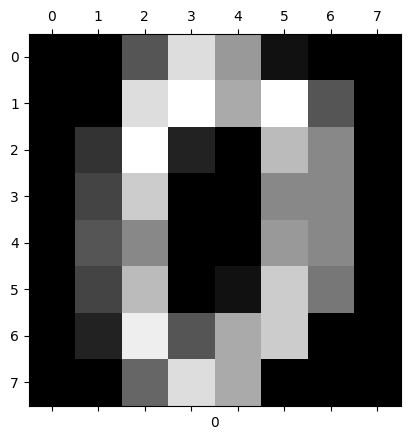

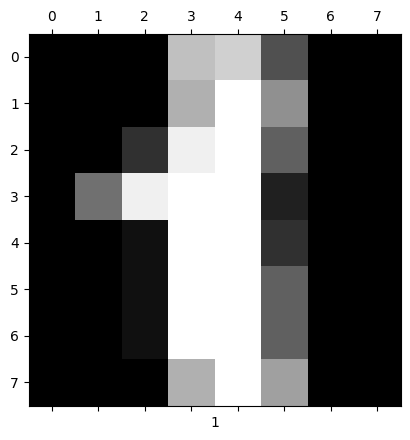

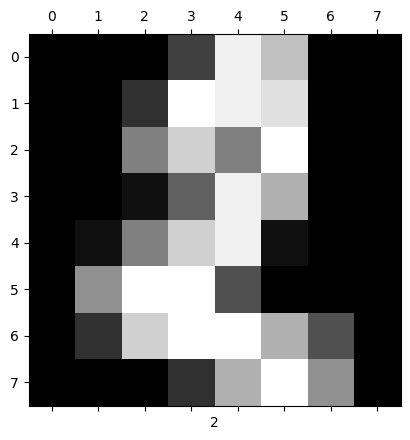

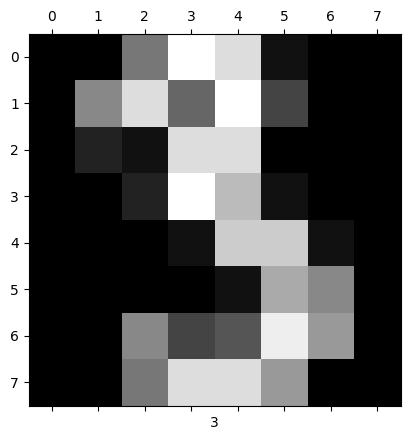

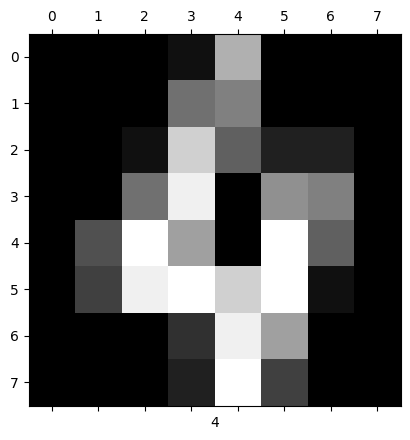

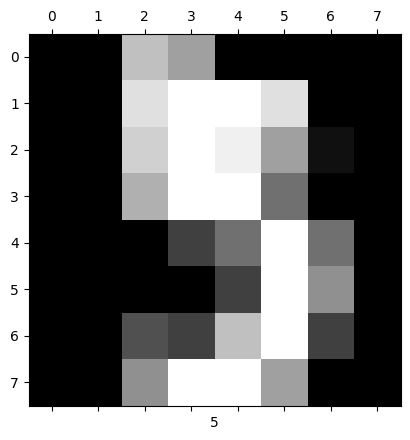

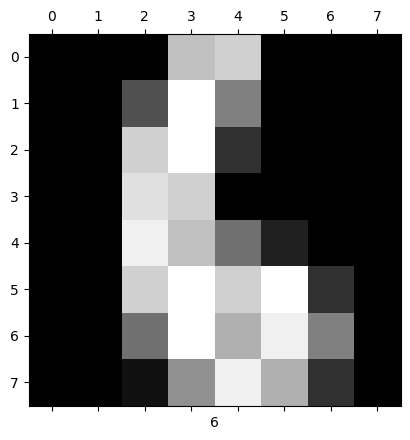

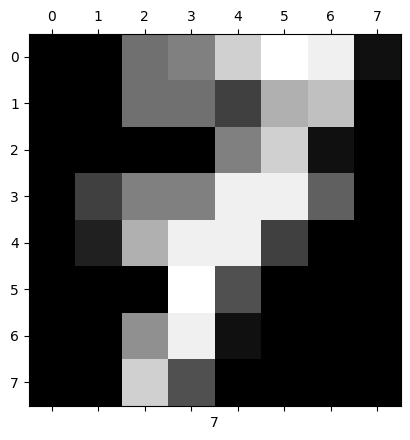

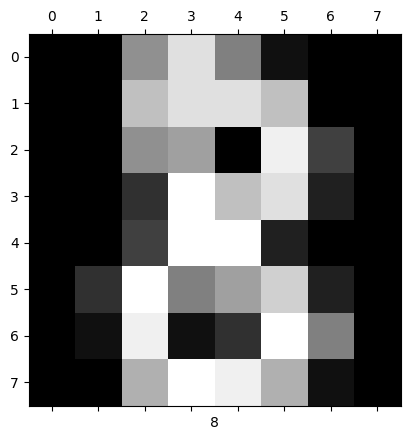

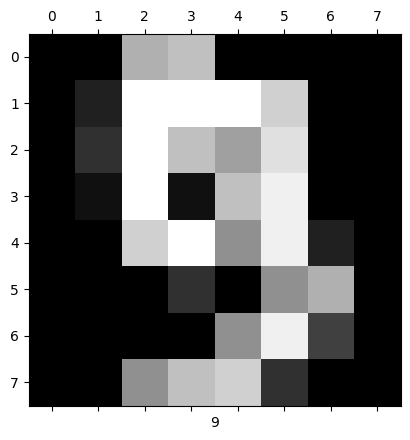

In [6]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(10):
  plt.matshow(dig.images[i])
  plt.xlabel(dig.target[i])
  plt.show()

In [7]:
df=pd.DataFrame(dig.data,columns=dig.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [8]:
df["target"]=dig.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [9]:
x=df.drop("target",axis=1)
y=df.target.values

In [10]:
x.columns.dtype

dtype('O')

In [11]:
y.dtype

dtype('int64')

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
dig.data[31].shape

(64,)

In [14]:
x.shape

(1797, 64)

In [15]:
xtrain.shape

(1257, 64)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=120,) # default 100
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=120)

In [17]:
rf.score(xtest,ytest)

0.975925925925926

In [18]:
rf.score(xtrain,ytrain)

1.0

In [19]:
pred=rf.predict(xtest)
rf.score(xtest,pred)

1.0

In [20]:
rf.predict([dig.data[12]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [21]:
dig.target[12]

np.int64(2)

In [22]:
rf.predict([dig.data[31]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([9])

In [23]:
dig.target[31]

np.int64(9)

In [24]:
df['pred']=rf.predict(x)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,pred
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9,9


In [25]:
df['equal']= df['target']==df['pred']
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,pred,equal
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0,True
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1,True
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,2,True
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3,True
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9,9,True
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0,0,True
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8,8,True
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9,9,True


In [26]:
df.equal.value_counts()

,count
equal,
True,1784
False,13


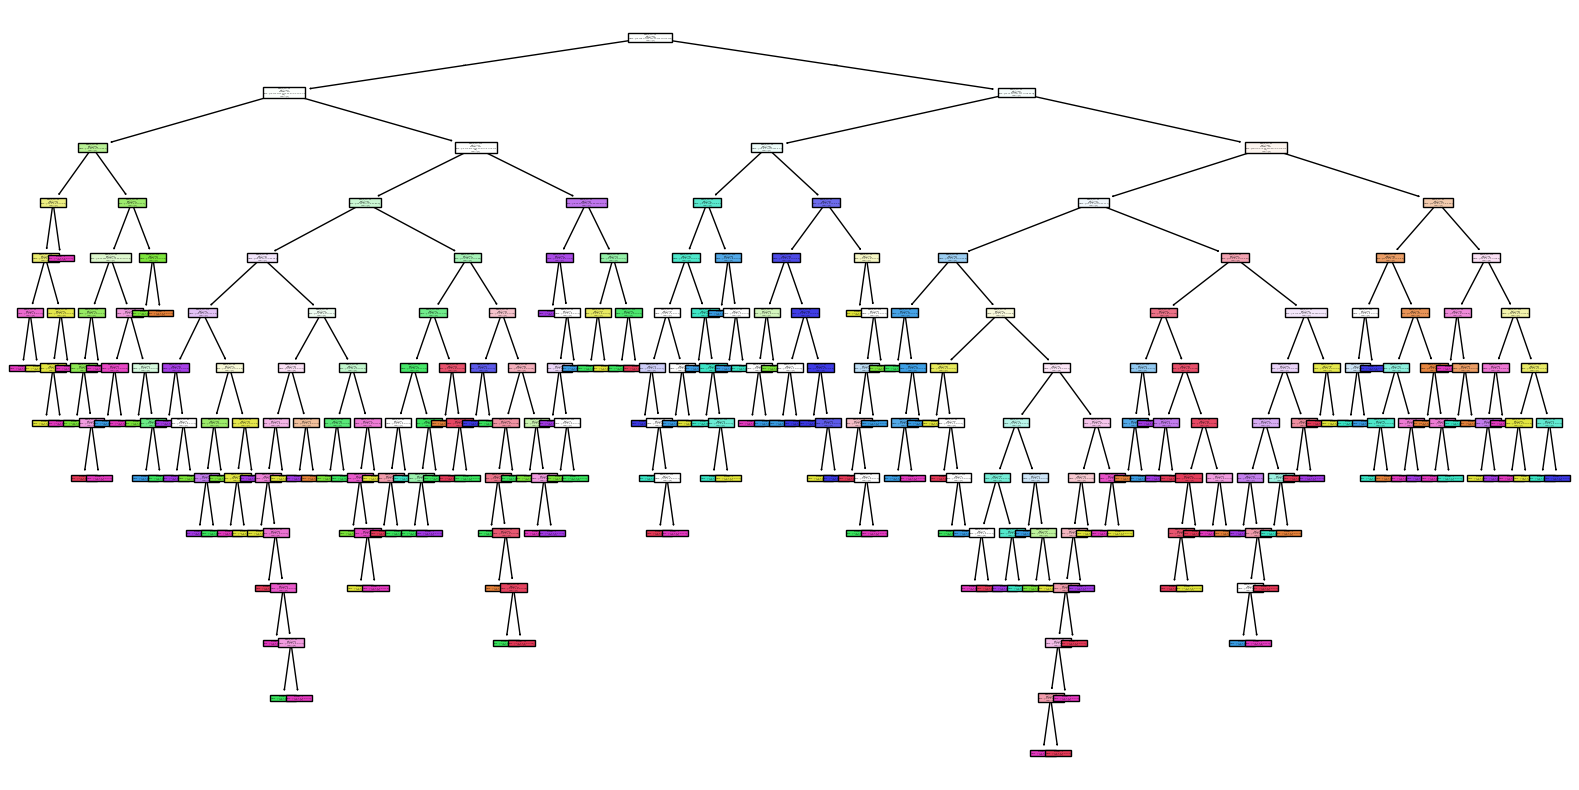

In [27]:
from sklearn.tree import plot_tree
tree_index = 0
single_tree = rf.estimators_[tree_index]


plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, feature_names=x.columns, class_names=True)
plt.show()


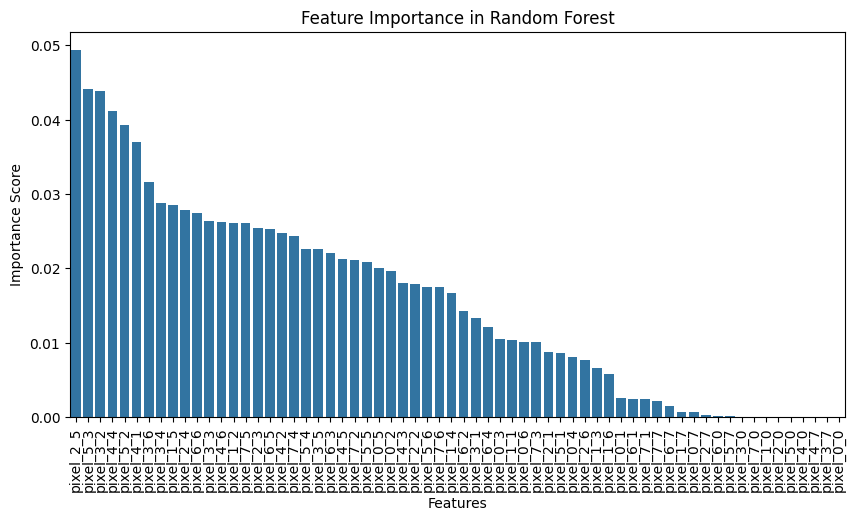

In [30]:
import seaborn as sns


feature_importance = rf.feature_importances_


sorted_indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 5))
sns.barplot(x=[x.columns[i] for i in sorted_indices], y=feature_importance[sorted_indices])

plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest")
plt.xticks(rotation=90)
plt.show()


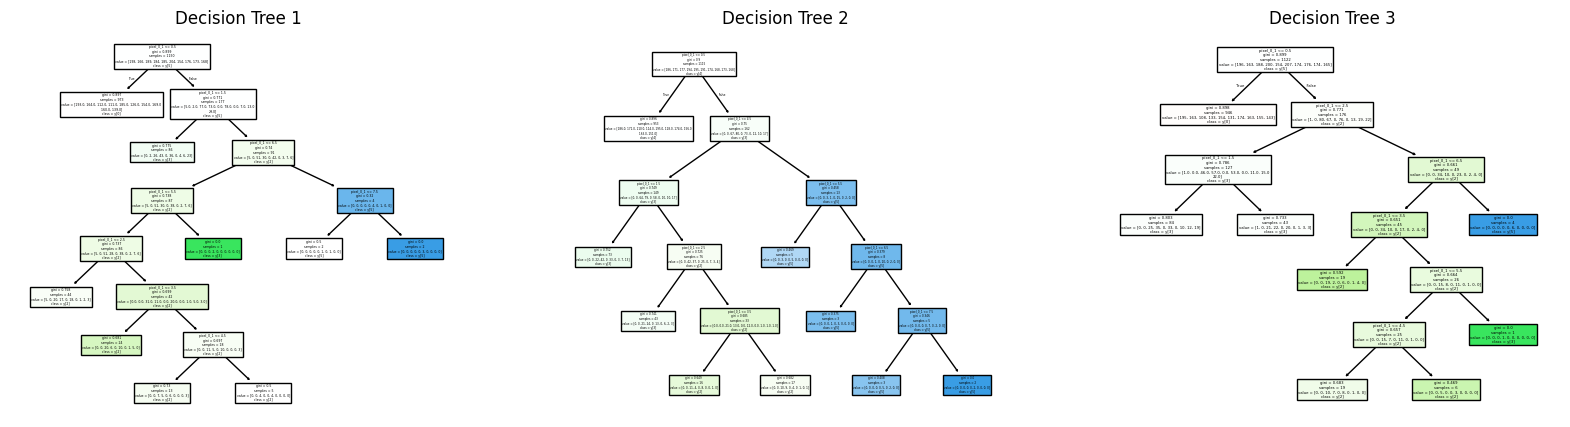

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

for i in range(3):
    plot_tree(rf.estimators_[i], filled=True, feature_names=x.columns, class_names=True, ax=axes[i])
    axes[i].set_title(f"Decision Tree {i+1}")

plt.show()
